# Customer Churn Analysis 💸

In this discussion, we are exclusively focusing on churn analysis, concentrating on building a model to predict potential customer loss. The topic of **customer retention** is not part of our current scope.

> "Good things take time." - Unknown

## INDEX

- [INTRODUCTION](#introduction)
- [DATA COLLECTION](#data-collection)
- [DATA CLEANING](#data-cleaning)
- [DATA VISUALIZATION](#data-visualization)
- [DATA PRE-PROCESSING](#data-pre-processing)
- [FEATURE ENGINEERING](#feature-engineering)
- [MODEL BUILDING](#model-building)
- [MODEL EVALUATION](#model-evaluation)
- [CONCLUSION](#conclusion)

In [ ]:
import os
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick
from matplotlib.colors import to_rgba

from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

<a name="introduction"></a>

## INTRODUCTION

## DATA SOURCE

- There's no benchmark dataset for churn analysis, We are using the famous [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) kaggle dataset.
- We may often encounter imbalanced dataset where re-sampling methods may not improve the model performance.

### ABOUT THE DATASET

- Telco Customer Churn dataset is a collection of data related to customer churn in the telecommunications industry.
- It typically includes information about customers, their usage patterns, and whether they have churned or not.

<a name="data-collection"></a>

## DATA COLLECTION

In [ ]:
drive.mount('/content/drive', force_remount=True)
os.environ['KAGGLE_CONFIG_DIR'] = os.path.dirname('/content/drive/MyDrive/Colab Notebooks/kaggle.json')

Mounted at /content/drive


In [ ]:
!kaggle datasets download -d blastchar/telco-customer-churn

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 23.5MB/s]


In [ ]:
!mkdir -p data/extracted_data/
!unzip -qn telco-customer-churn.zip -d data/extracted_data/

In [ ]:
df = pd.read_csv("/content/data/extracted_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<a name="data-cleaning"></a>

## DATA CLEANING

### Dealing with missing values

In [ ]:
df.isna().sum().sum()

11

### Converting columns to proper data types

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.dtypes.to_frame()

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# only two category
binary_feature_names = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "PaperlessBilling"]

# 4 categories
categorical_feature_names1 = ["Contract"]

# 3 categories, these features are dependent on internet services
categorical_feature_names2 = ["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

# 4 categories
categorical_feature_names3 = ["PaymentMethod"]

# completely numerical features
numeric_feature_names = ["tenure", "MonthlyCharges", "TotalCharges"]

In [ ]:
df[["MonthlyCharges", "TotalCharges"]].dtypes

MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [ ]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].dropna()

In [ ]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
for col in categorical_feature_names2:
    print(df[col].unique())

['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


In [ ]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
for col in numeric_feature_names:
    print(col, df[col].min(), df[col].max())

tenure 0 72
MonthlyCharges 18.25 118.75
TotalCharges 18.8 8684.8


<a name="data-visualization"></a>

## DATA VISUALIZATION

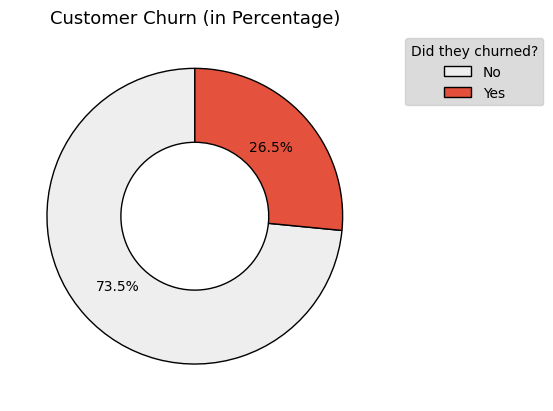

In [ ]:
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

def show_pie_chart(x, labels):

    ax = plt.pie(
        x,
        autopct='%1.1f%%',
        pctdistance=0.70,
        colors=["#eeeeee", "#e34530ee"], startangle=90, textprops={'color':'black', 'fontsize': 10}, center=(0.5, 0.5),
        wedgeprops=dict(width=0.5, edgecolor='black') # border
    )
    plt.legend(title="Did they churned?", frameon=True, facecolor='lightgray', bbox_to_anchor=(1.05, 1), labels=labels, loc='upper left')

    plt.title('Customer Churn (in Percentage)', fontsize=13)
    plt.show()

show_pie_chart(x=churn_percentage, labels=churn_percentage.index)

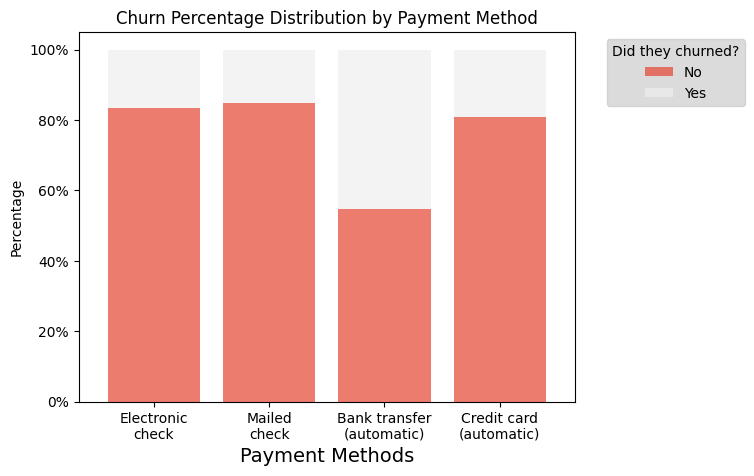

In [ ]:
churn_percentage = df.groupby(['PaymentMethod', 'Churn']).size().unstack('Churn', fill_value=0)
churn_percentage = churn_percentage.div(churn_percentage.sum(axis=1), axis=0) * 100

ax = churn_percentage.plot(kind='bar', stacked=True, width=0.8, color=["#e34530ee", "#eeeeee"], alpha=0.7)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))
ax.set_xticklabels(['Electronic\ncheck', 'Mailed\ncheck', 'Bank transfer\n(automatic)', 'Credit card\n(automatic)'])
plt.xticks(rotation=0)

plt.xlabel('Payment Methods', fontsize=14)
plt.ylabel('Percentage')
plt.title('Churn Percentage Distribution by Payment Method')

plt.legend(title="Did they churned?", frameon=True, facecolor='lightgray', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

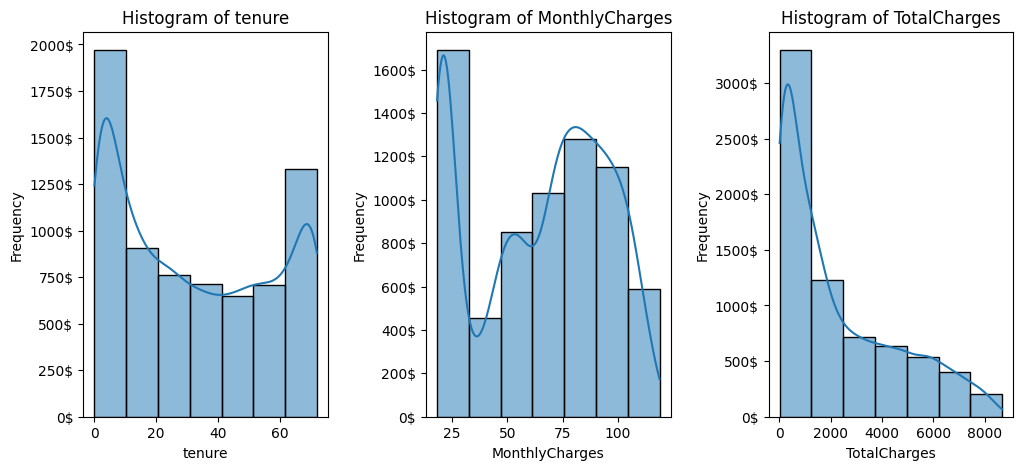

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for i, col in enumerate(numeric_feature_names):
    sns.histplot(df[col], bins=7, kde=True, ax=axes[i])
    axes[i].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}$'))
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.subplots_adjust(wspace=0.4)
plt.show()

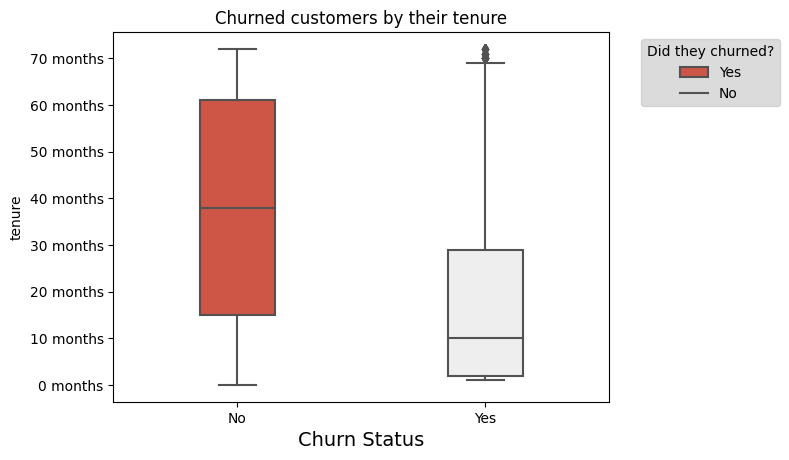

In [ ]:
ax = sns.boxplot(x='Churn', y='tenure', data=df, width=0.3, palette=["#e34530ee", "#eeeeee"])

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y)} months'))

plt.xlabel('Churn Status', fontsize=14)
plt.ylabel('tenure')
plt.title('Churned customers by their tenure')
plt.legend(title="Did they churned?", frameon=True, facecolor='lightgray', bbox_to_anchor=(1.05, 1), loc='upper left', labels=["Yes", "No"])

plt.show()

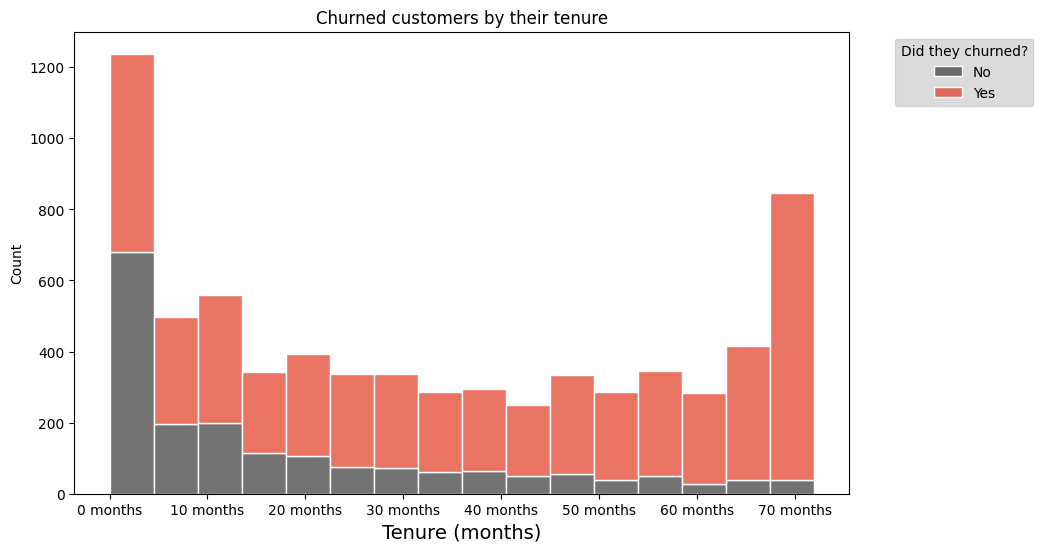

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(x='tenure', hue='Churn', data=df, multiple='stack', palette=["#e34530ee", "#444444"], edgecolor='white')

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)} months'))

plt.xlabel('Tenure (months)', fontsize=14)
plt.ylabel('Count')
plt.title('Churned customers by their tenure')
plt.legend(title="Did they churned?", frameon=True, facecolor='lightgray', bbox_to_anchor=(1.05, 1), loc='upper left', labels=["No", "Yes"])

plt.show()

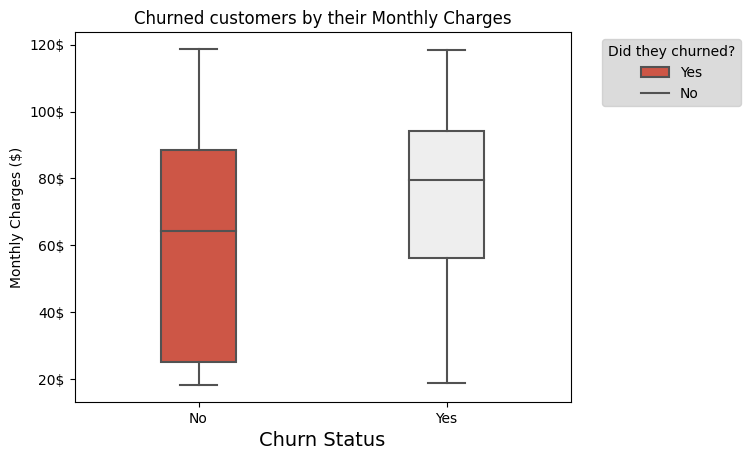

In [ ]:
ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=df, width=0.3, palette=["#e34530ee", "#eeeeee"])
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}$'))

plt.xlabel('Churn Status', fontsize=14)
plt.ylabel('Monthly Charges ($)')
plt.title('Churned customers by their Monthly Charges')
plt.legend(title="Did they churned?", frameon=True, facecolor='lightgray', bbox_to_anchor=(1.05, 1), loc='upper left', labels=["Yes", "No"])

plt.show()

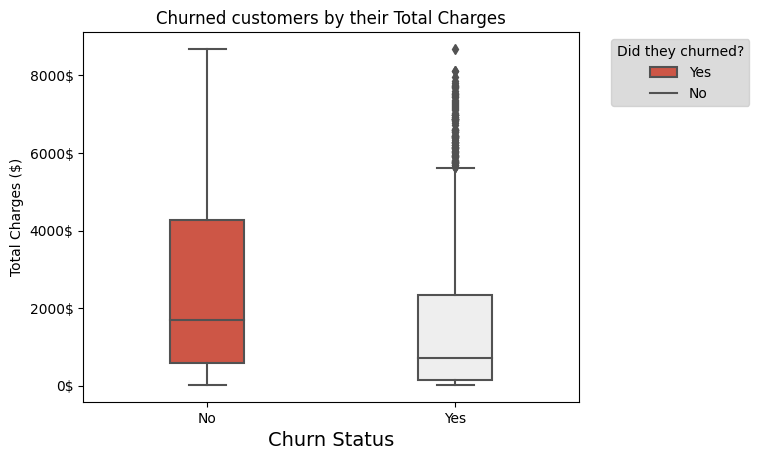

In [ ]:
ax = sns.boxplot(x='Churn', y='TotalCharges', data=df, width=0.3, palette=["#e34530ee", "#eeeeee"])
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}$'))

plt.xlabel('Churn Status', fontsize=14)
plt.ylabel('Total Charges ($)')
plt.title('Churned customers by their Total Charges')
plt.legend(title="Did they churned?", frameon=True, facecolor='lightgray', bbox_to_anchor=(1.05, 1), loc='upper left', labels=["Yes", "No"])

plt.show()

<a name="data-pre-processing"></a>

## DATA PRE-PROCESSING

Binary features:

- Gender
- Senior Citizen
- Partner
- Dependents
- Phone Service
- Paperless Billing

Categorical Features:

- Contract period

Numerical Features:

- Tenure
- MonthlyCharges
- TotalCharges

In [ ]:
from sklearn.preprocessing import LabelEncoder

df[binary_feature_names] = df[binary_feature_names].apply(LabelEncoder().fit_transform)
df[binary_feature_names].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling
0,0,0,1,0,0,1
1,1,0,0,0,1,0
2,1,0,0,0,1,1
3,1,0,0,0,0,0
4,0,0,0,0,1,1


In [ ]:
df[categorical_feature_names1].head()

,Contract
0,Month-to-month
1,One year
2,Month-to-month
3,One year
4,Month-to-month


In [ ]:
cat_features_encoded1 = pd.get_dummies(df[categorical_feature_names1], columns=['Contract'], prefix='Contract')
cat_features_encoded1.head()

,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [ ]:
cat_features_encoded3 = pd.get_dummies(df[categorical_feature_names3], columns=['PaymentMethod'], prefix='PaymentMethod')
cat_features_encoded3.head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [ ]:
cat_features_encoded2 = pd.get_dummies(df[categorical_feature_names2], columns=categorical_feature_names2, prefix='PaymentMethod')
cat_features_encoded2.head()

,PaymentMethod_DSL,PaymentMethod_Fiber optic,PaymentMethod_No,PaymentMethod_No,PaymentMethod_No internet service,PaymentMethod_Yes,PaymentMethod_No,PaymentMethod_No internet service,PaymentMethod_Yes,PaymentMethod_No,...,PaymentMethod_Yes,PaymentMethod_No,PaymentMethod_No internet service,PaymentMethod_Yes,PaymentMethod_No,PaymentMethod_No internet service,PaymentMethod_Yes,PaymentMethod_No,PaymentMethod_No internet service,PaymentMethod_Yes
0,1,0,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,0,1,1,0,0,0,...,1,1,0,0,1,0,0,1,0,0
2,1,0,0,0,0,1,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,0,1,1,0,0,0,...,1,0,0,1,1,0,0,1,0,0
4,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
for feature in categorical_feature_names2:
    unique_values = df[feature].unique()
    print(f"Unique values for {feature}: {unique_values}")


Unique values for InternetService: ['DSL' 'Fiber optic' 'No']
Unique values for OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values for OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values for DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values for TechSupport: ['No' 'Yes' 'No internet service']
Unique values for StreamingTV: ['No' 'Yes' 'No internet service']
Unique values for StreamingMovies: ['No' 'Yes' 'No internet service']


In [ ]:
pd.get_dummies(df[categorical_feature_names2], columns=categorical_feature_names2)

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,0,1,1,0,0,0,...,1,1,0,0,1,0,0,1,0,0
2,1,0,0,0,0,1,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,0,1,1,0,0,0,...,1,0,0,1,1,0,0,1,0,0
4,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
7039,0,1,0,1,0,0,0,0,1,0,...,1,1,0,0,0,0,1,0,0,1
7040,1,0,0,0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
7041,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
df[numeric_feature_names].dtypes.to_frame()

,0
tenure,int64
MonthlyCharges,float64
TotalCharges,float64


In [ ]:
df[numeric_feature_names] = StandardScaler().fit_transform(df[numeric_feature_names])
df[numeric_feature_names].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994194
1,0.066327,-0.259629,-0.173740
2,-1.236724,-0.362660,-0.959649
3,0.514251,-0.746535,-0.195248
4,-1.236724,0.197365,-0.940457


<a name="feature-engineering"></a>

## FEATURE ENGINEERING

In [ ]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, LabelEncoder

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical1', categorical_transformer, binary_feature_names+categorical_feature_names1+categorical_feature_names2+categorical_feature_names3),
        ('numeric', numeric_transformer, numeric_feature_names),
    ])

df_processed = preprocessor.fit_transform(df[binary_feature_names+categorical_feature_names1+categorical_feature_names2+categorical_feature_names3+numeric_feature_names])
print(np.shape(df_processed))

(7043, 43)


In [ ]:
X = df[binary_feature_names+categorical_feature_names1+categorical_feature_names2+categorical_feature_names3+numeric_feature_names]
X.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Contract,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaymentMethod,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,Month-to-month,DSL,No,Yes,No,No,No,No,Electronic check,-1.277445,-1.160323,-0.994194
1,1,0,0,0,1,0,One year,DSL,Yes,No,Yes,No,No,No,Mailed check,0.066327,-0.259629,-0.173740
2,1,0,0,0,1,1,Month-to-month,DSL,Yes,Yes,No,No,No,No,Mailed check,-1.236724,-0.362660,-0.959649
3,1,0,0,0,0,0,One year,DSL,Yes,No,Yes,Yes,No,No,Bank transfer (automatic),0.514251,-0.746535,-0.195248
4,0,0,0,0,1,1,Month-to-month,Fiber optic,No,No,No,No,No,No,Electronic check,-1.236724,0.197365,-0.940457


In [ ]:
X.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
PhoneService          int64
PaperlessBilling      int64
Contract             object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
PaymentMethod        object
tenure              float64
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [ ]:

X = preprocessor.fit_transform(X)
print(np.shape(X))

(7043, 43)


In [ ]:
X

array([[ 1.        ,  0.        ,  1.        , ..., -1.27744458,
        -1.16032292, -0.99419409],
       [ 0.        ,  1.        ,  1.        , ...,  0.06632742,
        -0.25962894, -0.17373982],
       [ 0.        ,  1.        ,  1.        , ..., -1.23672422,
        -0.36266036, -0.95964911],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -0.87024095,
        -1.1686319 , -0.85451414],
       [ 0.        ,  1.        ,  0.        , ..., -1.15528349,
         0.32033821, -0.87209546],
       [ 0.        ,  1.        ,  1.        , ...,  1.36937906,
         1.35896134,  2.01234407]])

In [ ]:
y = LabelEncoder().fit_transform(df[['Churn']].values.ravel())

In [ ]:
print(f"Total number of NaN: {pd.DataFrame(X).isna().sum().sum()}")

Total number of NaN: 11


### HANDLING CLASS IMBALANCE

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([5174, 1869]))

In [ ]:
# remove the NaN
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Handle minority class Imbalance with SMOTE(Synthetic Minority Over-sampling Technique)
X, y = SMOTE(random_state=2023).fit_resample(X, y.ravel())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=True, random_state=2023)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([3373, 3353]))

<a name="model-building"></a>

## MODEL BUILDING

In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

train_accuracies = []
test_accuracies = []
classifier_names = []

print("Training and test accuracies for different algorithms: ")

for name, clf in classifiers.items():

    clf.fit(X_train, y_train)

    train_predictions = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)

    test_predictions = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)

    classifier_names.append(name)
    train_accuracies.append(round(train_accuracy * 100, 2))
    test_accuracies.append(round(test_accuracy * 100, 2))

    print(f"{name} - Train Accuracy: {round(train_accuracy * 100, 2)}%, Test Accuracy: {round(test_accuracy * 100, 2)}%")

Training and test accuracies for different algorithms: 
Logistic Regression - Train Accuracy: 77.33%, Test Accuracy: 77.42%
Random Forest - Train Accuracy: 99.94%, Test Accuracy: 85.48%
Support Vector Classifier - Train Accuracy: 81.33%, Test Accuracy: 80.04%
Gradient Boosting - Train Accuracy: 85.19%, Test Accuracy: 85.17%


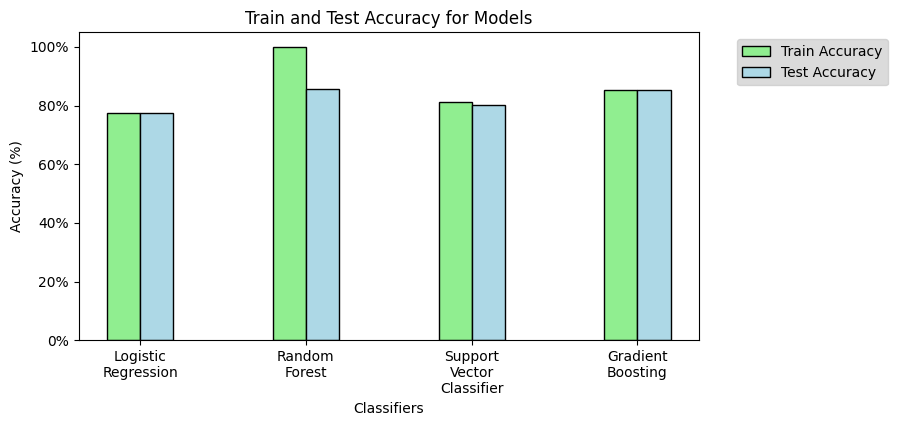

In [ ]:
bar_width = 0.2
index = np.arange(len(classifier_names))

fig, ax = plt.subplots(figsize=(8, 4))
bar1 = ax.bar(index, train_accuracies, bar_width, label='Train Accuracy', color=["lightgreen"], edgecolor="black")
bar2 = ax.bar(index + bar_width, test_accuracies, bar_width, label='Test Accuracy', color=["lightblue"], edgecolor="black")

ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Train and Test Accuracy for Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([l.replace(" ", "\n") for l in classifier_names])

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(frameon=True, facecolor='lightgray', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<a name="model-evaluation"></a>

## MODEL EVALUATION

In [ ]:
def calculate_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)
    return fpr, tpr, roc_auc

def plot_roc_curves(classifiers, X_train, y_train, X_test, y_test):

    auc_values = []
    plt.figure(figsize=(6, 6))

    for name, clf in classifiers.items():

        try:
            # For algorithms which can yield simple probabilistic output
            y_scores = clf.predict_proba(X_test)[:, 1]
        except AttributeError:
            # For classifiers that don't support predict_proba
            y_scores = clf.decision_function(X_test)

        fpr, tpr, roc_auc = calculate_roc_curve(y_test, y_scores)
        auc_values.append((name, roc_auc))
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # This line is for a performance where the model is like random guess
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    # We will display the algorithm names with the AUC (Area under curve)
    legend_labels = [f'{name} (AUC = {auc:.2f})' for name, auc in auc_values]

    plt.title('Receiver Operating Characteristic (ROC) Curves for Different models')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(labels=legend_labels, frameon=True, facecolor='lightgray', loc='lower right')
    plt.grid(True)
    plt.show()

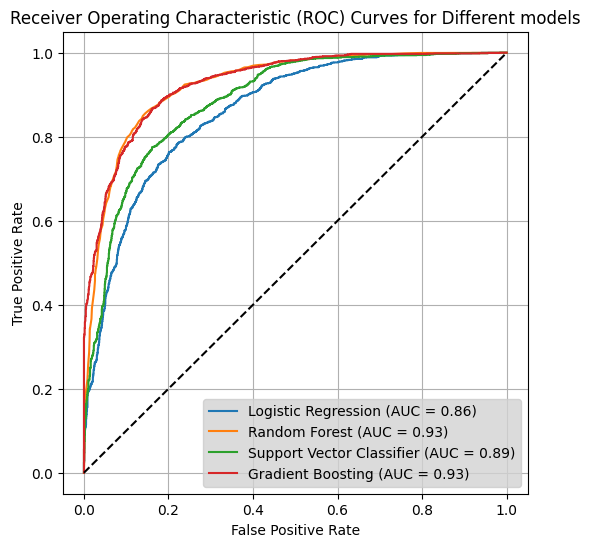

In [ ]:
plot_roc_curves(classifiers, X_train, y_train, X_test, y_test)

<a name="conclusion"></a>

## CONCLUSION

- We are going with Random forest because it works really well for our dataset.
- It beats simpler algorithms like Logistic Regression and fancier methods such as SVM, So we're sticking with what's effective.

In [ ]:
with open('preprocessor.pkl', 'wb') as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file)

with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(classifiers['Random Forest'], model_file)

In [ ]:
with open('preprocessor.pkl', 'rb') as preprocessor_file:
    preprocessor = pickle.load(preprocessor_file)

with open('random_forest_model.pkl', 'rb') as model_file:
    random_forest_model = pickle.load(model_file)

customer_info = pd.DataFrame({
    'gender': [0],
    'SeniorCitizen': [1],
    'Partner': [1],
    'Dependents': [0],
    'PhoneService': [0],
    'PaperlessBilling': [1],
    'Contract': ['Month-to-month'],
    'InternetService': ['DSL'],
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['Yes'],
    'DeviceProtection': ['No'],
    'TechSupport': ['No'],
    'StreamingTV': ['No'],
    'StreamingMovies': ['No'],
    'PaymentMethod': ['Electronic check'],
    'tenure': [-1.277445],
    'MonthlyCharges': [-1.160323],
    'TotalCharges': [-0.994194]
})

customer_info_processed = preprocessor.transform(customer_info)
logistic_regression_predictions = random_forest_model.predict(customer_info_processed)
print(logistic_regression_predictions[0])

1
